In [1]:
from lifelines.datasets import load_waltons

In [18]:
df = load_waltons() # returns a Pandas DataFrame
print(df.head(),'\n')
print(df['T'].min(), df['T'].max(),'\n')
print(df['E'].value_counts(),'\n')
print(df['group'].value_counts(),'\n')
#T为死亡时间，是一个持续时间数组，E是一个布尔数组或二进制数组，表示是否观察到“死亡”，1代表观测到了，0代表未观测到
#group代表是否存在病毒， miR-137代表存在病毒，control代表为不存在即对照组，根据统计，存在miR-137病毒人数34人，不存在129人。

      T  E    group
0   6.0  1  miR-137
1  13.0  1  miR-137
2  13.0  1  miR-137
3  13.0  1  miR-137
4  19.0  1  miR-137 

6.0 75.0 

1    156
0      7
Name: E, dtype: int64 

control    129
miR-137     34
Name: group, dtype: int64 



In [19]:
# Kaplan Meier模型（专用于估计生存函数的模型）
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(df['T'], event_observed=df['E'])  # or, more succinctly, kmf.fit(T, E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 163 total observations, 7 right-censored observations>

In [20]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
6.0,0.993865
7.0,0.987730
9.0,0.969210
13.0,0.950690
15.0,0.938344
17.0,0.932170
19.0,0.913650
22.0,0.888957


<AxesSubplot:xlabel='timeline'>

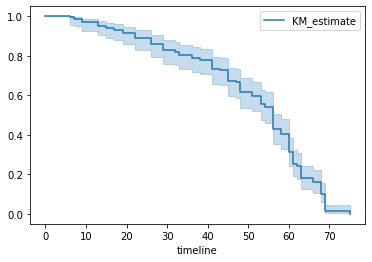

In [8]:
kmf.plot_survival_function()
#蓝色实线为生存曲线，浅蓝色带代表了95%置信区间

In [9]:
kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.000000
6.0,0.006135
7.0,0.012270
9.0,0.030790
13.0,0.049310
15.0,0.061656
17.0,0.067830
19.0,0.086350
22.0,0.111043


<AxesSubplot:xlabel='timeline'>

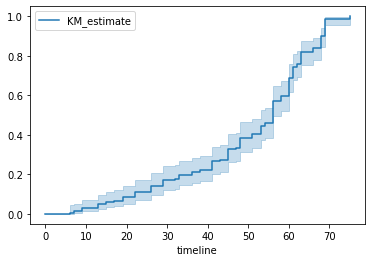

In [10]:
# 累积密度函数
kmf.plot_cumulative_density()

In [11]:
#中位生存时间,也就是50%的人的死亡时间
from lifelines.utils import median_survival_times

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)

In [14]:
median_

56.0

In [13]:
median_confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.5,53.0,58.0


In [ ]:
# 我们真正要关注的实验组（存在病毒）和对照组（未存在病毒）的生存曲线差异。因此我们要按照group等于“miR-137”和“control”分组，
# 分别观察对应的生存曲线

带有miR-137病毒存活50%对应的存活时间95%置信区间：'
'      miR-137_lower_0.95  miR-137_upper_0.95
0.5                19.0                29.0 

未带有miR-137病毒存活50%对应的存活时间95%置信区间：'
'      control_lower_0.95  control_upper_0.95
0.5                56.0                60.0


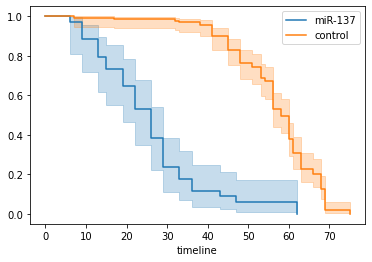

In [35]:
groups = df['group']
ix = (groups == 'miR-137')
 
kmf.fit(df['T'][ix], df['E'][ix], label='miR-137')
ax = kmf.plot()
treatment_median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print("带有miR-137病毒存活50%对应的存活时间95%置信区间：'\n'", treatment_median_confidence_interval_, '\n')
 

kmf.fit(df['T'][~ix], df['E'][~ix], label='control')
#共享一个画布
ax = kmf.plot(ax=ax)
 
control_median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print("未带有miR-137病毒存活50%对应的存活时间95%置信区间：'\n'", control_median_confidence_interval_)

In [ ]:
# 带有miR-137病毒的生存曲线在control组下方。说明其平均存活时间明显小于control组。
# 同时带有miR-137病毒存活50%对应的存活时间95%置信区间为[19,29]，对应的control组为[56,60]。
# 差异较大，这个方法可以应用在分析用户流失等场景，比如我们对一组人群实行了一些防止流行活动，我们可以通过此种方式分析我们活动是否有效。
